In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

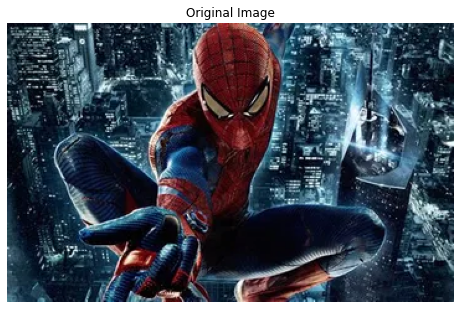

In [2]:
img = cv2.imread('img.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.title("Original Image")
plt.show()

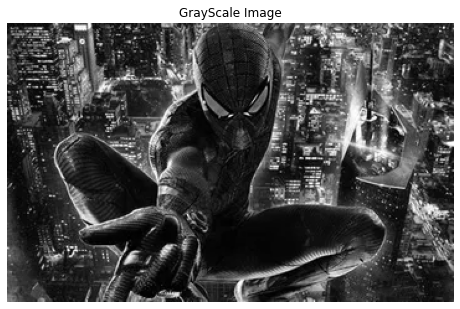

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(gray,cmap="gray")
plt.axis('off')
plt.title("GrayScale Image")
plt.show()

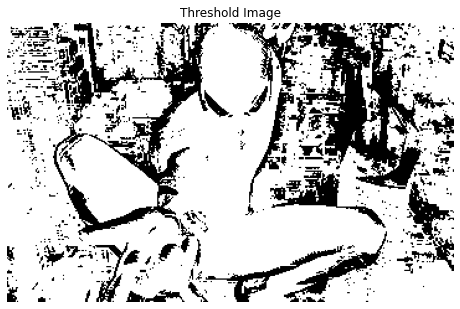

In [4]:
ret, thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)
plt.figure(figsize=(8,8))
plt.imshow(thresh,cmap="gray")
plt.axis('off')
plt.title("Threshold Image")
plt.show()

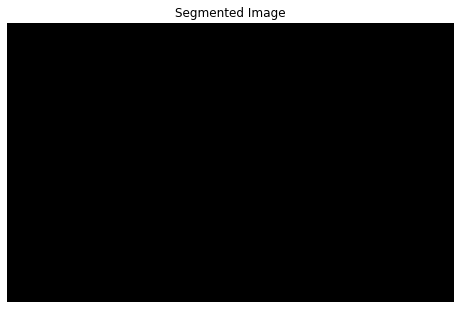

In [5]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,kernel, iterations = 15)
bg = cv2.dilate(closing, kernel, iterations = 1)
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0)
ret, fg = cv2.threshold(dist_transform, 0.02*dist_transform.max(), 255, 0)
cv2.imshow('image', fg)
plt.figure(figsize=(8,8))
plt.imshow(fg,cmap="gray")
plt.axis('off')
plt.title("Segmented Image")
plt.show()